In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
a=pd.read_csv("//content/data set statml.csv")
print(a)

     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0     25         130           80  15.0        98         86  high risk
1     35         140           90  13.0        98         70  high risk
2     29          90           70   8.0       100         80  high risk
3     30         140           85   7.0        98         70  high risk
4     35         120           60   6.1        98         76   low risk
..   ...         ...          ...   ...       ...        ...        ...
144   17         120           80   6.7       102         76   mid risk
145   14          90           65   7.0       101         70  high risk
146   15          80           60   6.7        98         80   low risk
147   15         100           65   6.7        98         76   low risk
148   12          95           60   6.7        98         77   low risk

[149 rows x 7 columns]


In [ ]:
print(a.isnull())

       Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0    False       False        False  False     False      False      False
1    False       False        False  False     False      False      False
2    False       False        False  False     False      False      False
3    False       False        False  False     False      False      False
4    False       False        False  False     False      False      False
..     ...         ...          ...    ...       ...        ...        ...
144  False       False        False  False     False      False      False
145  False       False        False  False     False      False      False
146  False       False        False  False     False      False      False
147  False       False        False  False     False      False      False
148  False       False        False  False     False      False      False

[149 rows x 7 columns]


In [ ]:
y=a['RiskLevel']
y

0      high risk
1      high risk
2      high risk
3      high risk
4       low risk
         ...    
144     mid risk
145    high risk
146     low risk
147     low risk
148     low risk
Name: RiskLevel, Length: 149, dtype: object

In [ ]:
x= a.replace({'high risk':2,'low risk':0,'mid risk':1})
x

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98,86,2
1,35,140,90,13.0,98,70,2
2,29,90,70,8.0,100,80,2
3,30,140,85,7.0,98,70,2
4,35,120,60,6.1,98,76,0
...,...,...,...,...,...,...,...
144,17,120,80,6.7,102,76,1
145,14,90,65,7.0,101,70,2
146,15,80,60,6.7,98,80,0
147,15,100,65,6.7,98,76,0


In [ ]:
x=a.drop('RiskLevel',axis=1)
x

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98,86
1,35,140,90,13.0,98,70
2,29,90,70,8.0,100,80
3,30,140,85,7.0,98,70
4,35,120,60,6.1,98,76
...,...,...,...,...,...,...
144,17,120,80,6.7,102,76
145,14,90,65,7.0,101,70
146,15,80,60,6.7,98,80
147,15,100,65,6.7,98,76


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=35)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

#print(x_train.isnull(),y_train.isnull())

     Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
22    21          90           65   7.50        98         76          0
77    55         120           90  12.00        98         70          1
142   17          90           63   6.90       101         70          1
12    25         110           89   7.01        98         77          0
38    45         120           95   6.10        98         66          0
..   ...         ...          ...    ...       ...        ...        ...
57    42         120           80   6.40        98         70          0
146   15          80           60   6.70        98         80          0
139   18         120           80   6.90       102         76          1
33    21         120           80   7.10        98         77          0
15    15         120           80   7.01        98         70          0

[119 rows x 7 columns]
22     low risk
77     mid risk
142    mid risk
12     low risk
38     low risk
         ...   
57  

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred1 = model.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy_LR)
print("Classification Report:\n",report)

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

   high risk       0.93      1.00      0.97        14
    low risk       0.88      1.00      0.93         7
    mid risk       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




# Creating an SVM classifier
svm_classifier = SVC(kernel='linear')

# Training the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Makeing predictions on the test data
y_pred2 = svm_classifier.predict(x_test)

# Calculating accuracy
accuracy_svm1 = accuracy_score(y_test, y_pred2)
print(f"Accuracy:{accuracy_svm1}")
print("Classification Report:\n",report)


Accuracy:1.0
Classification Report:
               precision    recall  f1-score   support

   high risk       0.93      1.00      0.97        14
    low risk       0.88      1.00      0.93         7
    mid risk       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from imblearn.over_sampling import SMOTE



# Initializing SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE to the dataset
X_resampled,y_resampled= smote.fit_resample(x,y)

(153, 6) (153,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=35)
#print(x_train)
#print(y_train)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train.isnull(),y_train.isnull())

(122, 7)
(122,)
(31, 7)
(31,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred3 = model.predict(x_test)
accuracy_AFLR = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3)

print("Accuracy:", accuracy_AFLR)
print("Classification Report:\n",report)

Accuracy: 0.7741935483870968
Classification Report:
               precision    recall  f1-score   support

   high risk       0.78      0.88      0.82         8
    low risk       0.75      0.90      0.82        10
    mid risk       0.80      0.62      0.70        13

    accuracy                           0.77        31
   macro avg       0.78      0.80      0.78        31
weighted avg       0.78      0.77      0.77        31



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')
# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred4= svm_classifier.predict(X_test)
# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred4)
print(f"Accuracy:{accuracy_SVM}")
print("Classification Report:\n",report)

Accuracy:1.0
Classification Report:
               precision    recall  f1-score   support

   high risk       0.78      0.88      0.82         8
    low risk       0.75      0.90      0.82        10
    mid risk       0.80      0.62      0.70        13

    accuracy                           0.77        31
   macro avg       0.78      0.80      0.78        31
weighted avg       0.78      0.77      0.77        31



Accuracy: 0.39


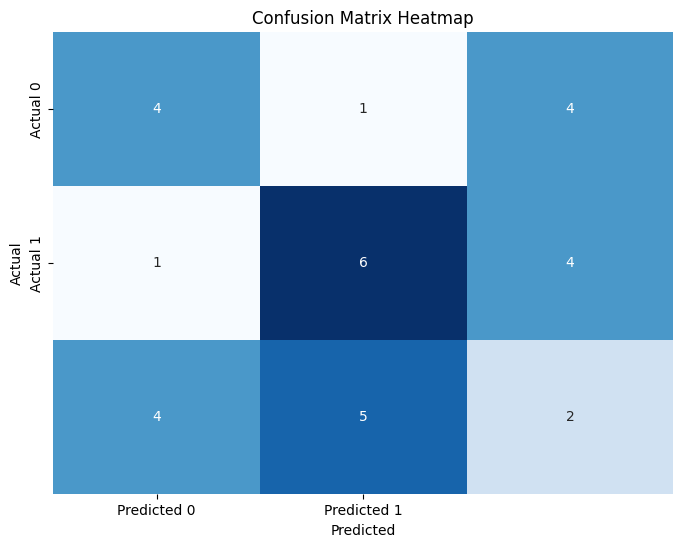

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred3)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

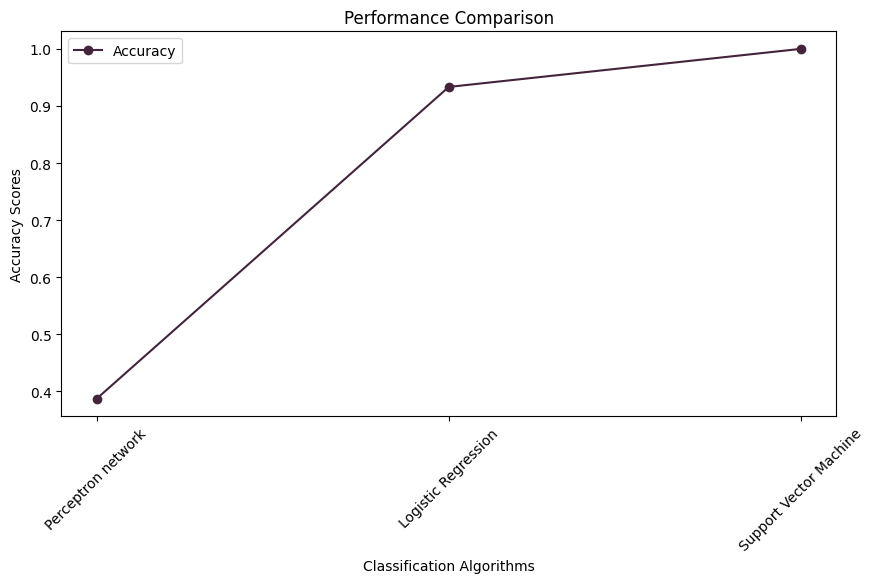

In [ ]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine']
accuracy_scores = [ accuracy , accuracy_LR , accuracy_SVM ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show()

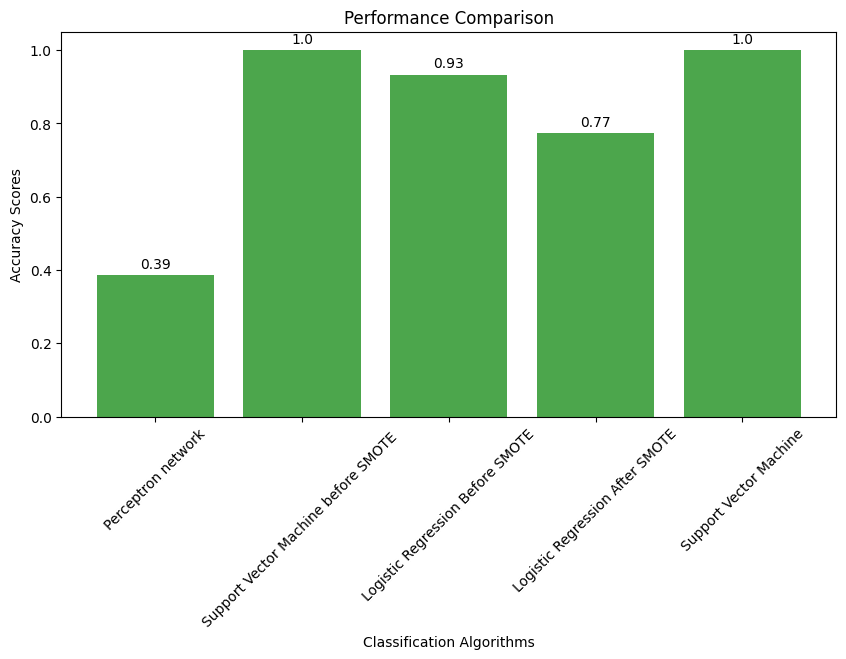

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = ['Perceptron network','Support Vector Machine before SMOTE ', 'Logistic Regression Before SMOTE','Logistic Regression After SMOTE', 'Support Vector Machine']
accuracy_scores = [accuracy,accuracy_svm1, accuracy_LR,accuracy_AFLR, accuracy_SVM]

plt.figure(figsize=(10, 5))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

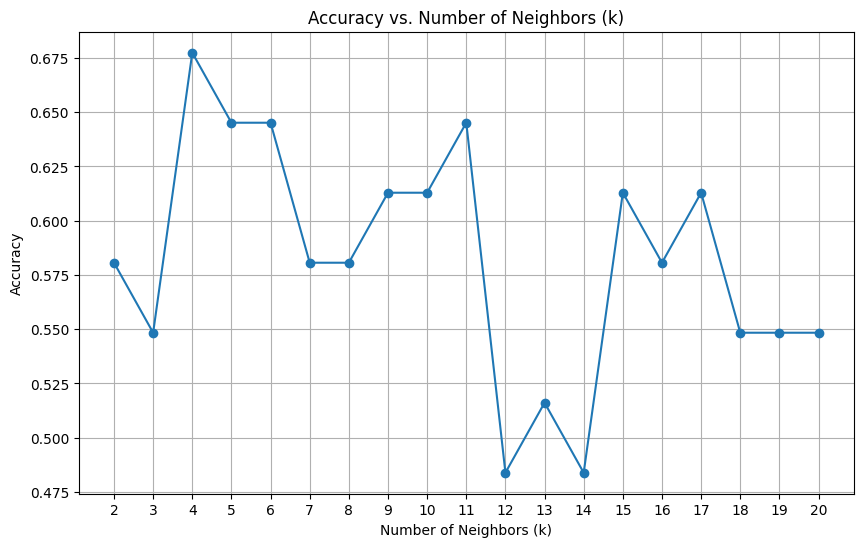

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists to store accuracy values and corresponding 'k' values
k_values = []
accuracy_values = []

# Iterate through different 'k' values from 2 to 20
for k in range(2, 21):
    # Create a k-NN classifier with the current 'k' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plot the accuracy versus 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
svm_classifier=svm.SVC(kernel='linear',C=1.0)

In [ ]:
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm_classifier.predict(x_test)

In [ ]:

num_bootstrap_samples = 150
accuracies = []
for _ in range(num_bootstrap_samples):
    sample_indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train
    y_bootstrap = y_train.values[sample_indices]
    svm_classifier.fit(x_bootstrap,y_bootstrap)
    y_pred_bootstrap=svm_classifier.predict(x_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")

Mean Accuracy (Bootstrapped): 0.32
95% Confidence Interval: 0.16 - 0.51
Coefficient of Variation: 31.67%
Standard Deviation of Accuracy: 0.10
Mean Square Error: 0.01
The model is not consistent.
